# Loading the Required Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data and Performing Basic Data Checks

In [2]:
df = pd.read_csv('HousingData.csv') 

In [3]:
print(df.shape)

(506, 14)


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Cleaning Data

Check Correlation

<AxesSubplot:>

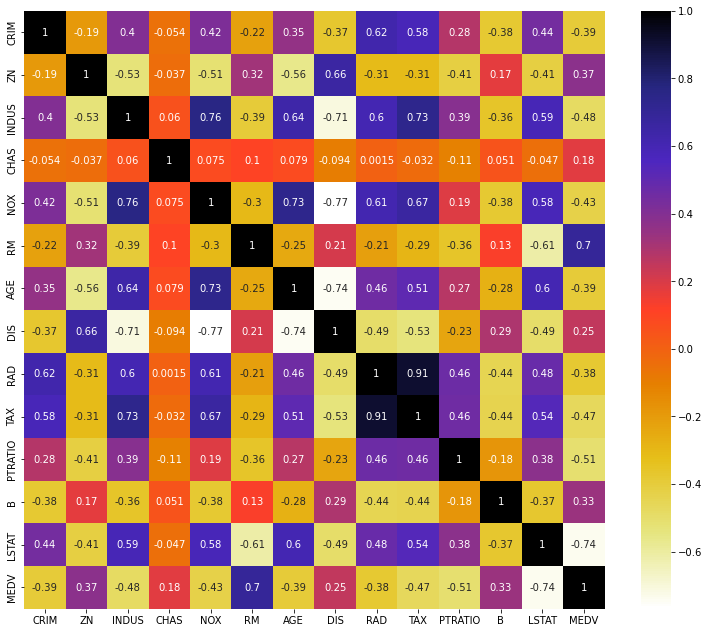

In [6]:
plt.figure(figsize=(13,11))
cor=df.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)

In [7]:
#Drop Nox because correlation is greater than 75%
dropc=['NOX']
df.drop(dropc, inplace=True, axis=1)

<AxesSubplot:>

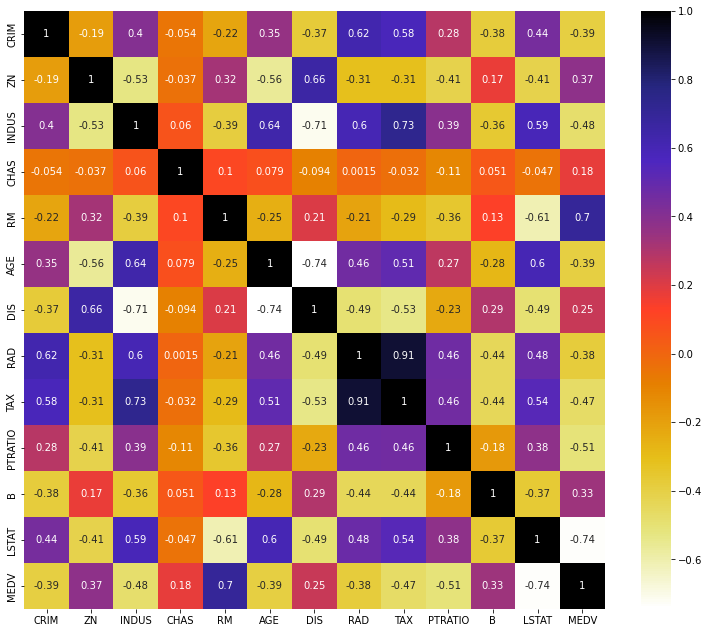

In [8]:
plt.figure(figsize=(13,11))
cor=df.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)

# Check there is any Null in data

In [9]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# Drop the Null

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# check shape of data

In [12]:
print(df.shape)

(394, 13)


# check duplicated data

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
5      False
       ...  
499    False
500    False
502    False
503    False
504    False
Length: 394, dtype: bool

# Creating Arrays for the Features and the Response Variable

In [14]:
target_column = ['MEDV'] 

Normalizes the predictors. This is done because the units of the variables differ significantly and may influence the modeling process. To prevent this, we will do normalization via scaling of the predictors between 0 and 1.

In [15]:
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,0.041473,0.114607,0.396570,0.068528,0.715264,0.689327,0.313798,0.391815,0.571634,0.842617,0.903227,0.336295,22.359645
std,0.103426,0.239541,0.249040,0.252971,0.079497,0.278887,0.173057,0.359727,0.236726,0.098475,0.224952,0.192479,9.142979
min,0.000071,0.000000,0.016583,0.000000,0.405581,0.029000,0.093151,0.041667,0.263010,0.572727,0.006551,0.045562,5.000000
25%,0.000921,0.000000,0.184932,0.000000,0.669618,0.454750,0.174007,0.166667,0.394163,0.790909,0.949124,0.187648,16.800000
50%,0.003022,0.000000,0.308580,0.000000,0.706321,0.777000,0.263819,0.208333,0.464135,0.868182,0.988133,0.297603,21.050000
75%,0.038617,0.125000,0.652487,0.000000,0.752335,0.942500,0.421944,1.000000,0.936709,0.918182,1.000000,0.450816,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


# Creating the Training and Test Datasets

The first couple of lines of code create arrays of the independent (X) and dependent (y) variables

In [16]:
X = df[predictors].values
y = df[target_column].values

splits the data into training and test dataset, with the 'test_size' argument specifying the percentage of data to be kept in the test data.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape); print(X_test.shape)

(315, 12)
(79, 12)


In [19]:
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()  
st_x.fit_transform(X_train) 
X_train= st_x.transform(X_train)   
X_test= st_x.transform(X_test) 

# Build, Predict and Evaluate the Regression Model

# Linear Regression

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [22]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

3.9206810443179254
0.8000113654434131


In [23]:
pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

6.6487505392096375
0.5906778084288551


# Regularized Regression

# Ridge Regression

In [24]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 

Ridge(alpha=0.01)

In [25]:
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

3.920681058206184
0.8000113640265707


In [26]:
pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

6.648784706540628
0.5906736014781946


# Lasso Regression

In [27]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [28]:
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

3.9211696751866736
0.7999615135383212


In [29]:
pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

6.6710116446388215
0.5879322644107063


# ElasticNet Regression

In [30]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 

ElasticNet(alpha=0.01)

In [31]:
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

3.9214237536584946
0.7999355890699534


In [32]:
pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

6.664820964653109
0.5886967049388945
